In [48]:
import pandas as pd
df6 = pd.read_csv('OwenDS2.csv')
df6

,Unnamed: 0,Unnamed: 0.1,wp_identifier,network,location,program,program_type,start_time,end_time,archive_id,...,date_created,party,state,count,election_day,ad_date,days_to_election,days_to_election_num,days_to_election_cat,city
0,0,2084,238,WMUR,"Boston, MA/Manchester, NH",Good Morning America,news,12/23/15 12:48,12/23/15 12:48,PolAd_MarcoRubio_bpcj7,...,7/5/16 23:41,Republican,NH,1,2/9/16,12/23/15,48 days 00:00:00.000000000,48,1-2 Months,Manchester
1,1,2085,238,KPTH,"Sioux City, Iowa",Siouxland News at 9 on FOX 44,news,12/17/15 3:16,12/17/15 3:16,PolAd_MarcoRubio_bpcj7,...,7/5/16 23:41,Republican,IA,1,2/1/16,12/17/15,46 days 00:00:00.000000000,46,1-2 Months,Sioux City
2,2,2086,238,WHO,"Des Moines-Ames, Iowa",Channel 13 News at 10,news,12/25/15 4:29,12/25/15 4:29,PolAd_MarcoRubio_bpcj7,...,7/5/16 23:41,Republican,IA,1,2/1/16,12/25/15,38 days 00:00:00.000000000,38,1-2 Months,Des Moines-Ames
3,3,2087,238,KMEG,"Sioux City, Iowa",Wheel of Fortune,not news,12/20/15 0:53,12/20/15 0:53,PolAd_MarcoRubio_bpcj7,...,7/5/16 23:41,Republican,IA,1,2/1/16,12/20/15,43 days 00:00:00.000000000,43,1-2 Months,Sioux City
4,4,2088,238,KTIV,"Sioux City, Iowa",News 4 at Noon,news,12/22/15 18:17,12/22/15 18:17,PolAd_MarcoRubio_bpcj7,...,7/5/16 23:41,Republican,IA,1,2/1/16,12/22/15,41 days 00:00:00.000000000,41,1-2 Months,Sioux City
5,5,2089,238,WBZ,"Boston, MA/Manchester, NH",The Late Show With Stephen Colbert,news,12/18/15 5:03,12/18/15 5:04,PolAd_MarcoRubio_bpcj7,...,7/5/16 23:41,Republican,NH,1,2/9/16,12/18/15,53 days 00:00:00.000000000,53,1-2 Months,Manchester
6,6,2090,238,KCRG,"Ceder Rapids-Waterloo-Iowa City-Dublin, Iowa",Jimmy Kimmel Live,news,12/18/15 4:59,12/18/15 4:59,PolAd_MarcoRubio_bpcj7,...,7/5/16 23:41,Republican,IA,1,2/1/16,12/18/15,45 days 00:00:00.000000000,45,1-2 Months,Ceder Rapids-Waterloo-Iowa City-Dublin
7,7,2091,238,WBZ,"Boston, MA/Manchester, NH",The Late Late Show With James Corden,not news,12/16/15 6:16,12/16/15 6:16,PolAd_MarcoRubio_bpcj7,...,7/5/16 23:41,Republican,NH,1,2/9/16,12/16/15,55 days 00:00:00.000000000,55,1-2 Months,Manchester
8,8,2092,238,WMUR,"Boston, MA/Manchester, NH",Closeup,news,12/20/15 15:23,12/20/15 15:23,PolAd_MarcoRubio_bpcj7,...,7/5/16 23:41,Republican,NH,1,2/9/16,12/20/15,51 days 00:00:00.000000000,51,1-2 Months,Manchester
9,9,2093,238,KCAU,"Sioux City, Iowa",ABC9 News Midday,news,12/29/15 17:51,12/29/15 17:52,PolAd_MarcoRubio_bpcj7,...,7/5/16 23:41,Republican,IA,1,2/1/16,12/29/15,34 days 00:00:00.000000000,34,1-2 Months,Sioux City


In [50]:
import datetime as dt

#df6['start_year'] = pd.DatetimeIndex(df6['start_time']).year


In [52]:
#df6['start_month'] = pd.DatetimeIndex(df6['start_time']).month

In [4]:
#df6['start_day'] = pd.DatetimeIndex(df6['start_time']).day

In [5]:
#df6['end_year'] = pd.DatetimeIndex(df6['end_time']).year

In [6]:
#df6['end_month'] = pd.DatetimeIndex(df6['end_time']).month

In [7]:
#df6['end_day']= pd.DatetimeIndex(df6['end_time']).day

In [53]:
import datetime as dt
df6['start_time'] = pd.to_datetime(df6['start_time'], coerce=True)
df6['day_week'] = df6['start_time'].dt.dayofweek
#will ouput what day within the 7 day week
#Monday=0, Sunday= 6

/Users/elizabethchabot/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: the coerce=True keyword is deprecated, use errors='coerce' instead
  from ipykernel import kernelapp as app


Was there a day that candidates were more likely to campaign and did the time vary for candidate? Additionally, create graphs showing when each candidate campaigned.

In [55]:
df6['ad_start'] = pd.to_datetime(df6['start_time'])
df6['ad_end'] = pd.to_datetime(df6['end_time'])
df6['runtime'] = df6['ad_end'] - df6['ad_start']
df6['runtime'].max()



Timedelta('0 days 00:05:00')

In [56]:
df7 = pd.read_csv('TotalAd_Votes.csv')

The longest ad runtime for the dataset is 5 minutes, so the day of the week of the ad can be determined by the startime. If the ad falls within a window where it could run into the next day the day that the ad began will be designated as the day the ad aired.

For the graph will need to determine the range of days, the range of possible ads aired, the candidates and create a new df with these variables.

Dive into candidate, party, and month


In [70]:
q4df = df6[['party', 'candidate', 'state', 'count', 'day_week', 'days_to_election_num']].copy()
q4df.groupby('day_week')['count'].sum()
q4 = q4df.groupby(['candidate', 'day_week'])['count'].count()

In [192]:
q4DF = pd.DataFrame(q4)
q4DF.to_csv('Q4.csv')
quest4 = pd.read_csv('Q4.csv')
quest4['count'].max()
sponsors = quest4['candidate'].unique()
sponsor = list(sponsors)
quest4['candidate'].unique()
quest4.index = quest4['candidate']
quest4
bargraph = quest4.drop(['Bernie Sanders, Donald Trump, Hillary Clinton','Carly Fiorina, Hillary Clinton, Donald Trump, Ted Cruz', 'Carly Fiorina, John Kasich, Hillary Clinton, Jeb Bush', 'Chris Christie, Hillary Clinton', 'Chris Christie, Jeb Bush, John Kasich'])
bargraph = bargraph.drop(['Donald Trump, Ben Carson, Jeb Bush, Ted Cruz, Marco Rubio','Donald Trump, Ben Carson, Marco Rubio, Ted Cruz', 'Donald Trump, Hillary Clinton', 'Donald Trump, Jeb Bush', 'Donald Trump, John Kasich', 'Donald Trump, Marco Rubio','Donald Trump, Ted Cruz', 'Donald Trump, Ted Cruz, Chris Christie, Jeb Bush, Hillary Clinton', 'Donald Trump, Ted Cruz, Hillary Clinton', 'Donald Trump, Ted Cruz, Marco Rubio, Jeb Bush'])  
bargraph = bargraph.drop(['Hillary Clinton, Donald Trump','Jeb Bush, Donald Trump, Hillary Clinton', 'Jeb Bush, Donald Trump, Marco Rubio', 'Jeb Bush, Donald Trump, Ted Cruz', 'Jeb Bush, Marco Rubio', 'Jeb Bush, Marco Rubio, Chris Christie','John Kasich, Chris Christie, Donald Trump, Marco Rubio, Hillary Clinton', 'John Kasich, Donald Trump', 'John Kasich, Donald Trump, Ted Cruz', 'John Kasich, Hillary Clinton', 'John Kasich, Hillary Clinton, Donald Trump, Ted Cruz'])
bargraph = bargraph.drop(['John Kasich, Hillary Clinton, Ted Cruz','John Kasich, Hillary Clinton, Ted Cruz, Donald Trump', 'John Kasich, Jeb Bush', 'John Kasich, Marco Rubio, Jeb Bush', 'John Kasich, Ted Cruz', 'John Kasich, Ted Cruz, Hillary Clinton, Donald Trump' , 'Marco Rubio, Donald Trump', 'Marco Rubio, Donald Trump, Ted Cruz', 'Marco Rubio, Donald Trump, Ted Cruz, Hillary Clinton', 'Marco Rubio, Hillary Clinton','Marco Rubio, Hillary Clinton, Jeb Bush', 'Marco Rubio, Jeb Bush','Marco Rubio, John Kasich, Hillary Clinton'])  #Mon = Monday[Monday['candidate'] == 'Hillary Clinton', 'Ben Carson','Bernie Sanders', 'Carly Fiorina', 'Chris Christie','Donald Trump', 'Donald Trump, ', 'Jeb Bush', 'John Kasich', 'Marco Rubio', "Martin O'Malley", 'Mike Huckabee', 'Ted Cruz' ]
bargraph = bargraph.drop(['Marco Rubio, Ted Cruz', "Martin O'Malley, Bernie Sanders, Jeb Bush, Hillary Clinton, Donald Trump, Carly Fiorina", 'Mike Huckabee, Donald Trump', 'Mike Huckabee, Rick Santorum, Ted Cruz, Marco Rubio, Rand Paul, Jeb Bush, Donald Trump', 'Mike Huckabee, Ted Cruz', 'Ted Cruz, Ben Carson, Hillary Clinton, John Kasich', 'Ted Cruz, Donald Trump', 'Ted Cruz, Donald Trump, Hillary Clinton', 'Ted Cruz, Donald Trump, John Kasich', 'Ted Cruz, Donald Trump, Marco Rubio'])
bargraph = bargraph.drop(['Ted Cruz, Hillary Clinton', 'Ted Cruz, Hillary Clinton, Marco Rubio, Bernie Sanders', 'Ted Cruz, John Kasich', 'Ted Cruz, Marco Rubio', 'Ted Cruz, Scott Walker'])

Monday = bargraph[(bargraph['day_week'] == 0 )]
Tuesday = bargraph[(bargraph['day_week'] == 1)]
Wednesday = bargraph[(bargraph['day_week'] == 2)]
Thursday = bargraph[(bargraph['day_week'] == 3)]
Friday = bargraph[(bargraph['day_week'] == 4)]
Saturday = bargraph[(bargraph['day_week'] == 5)]
Sunday = bargraph[(bargraph['day_week'] == 6)]
Donald_Trump2 = Monday[Monday['candidate']=='Donald Trump, ']
Saturday

,candidate,day_week,count
candidate,,,
Bernie Sanders,Bernie Sanders,5,3077
Carly Fiorina,Carly Fiorina,5,32
Chris Christie,Chris Christie,5,107
Donald Trump,Donald Trump,5,915
Hillary Clinton,Hillary Clinton,5,2604
Jeb Bush,Jeb Bush,5,344
John Kasich,John Kasich,5,435
Marco Rubio,Marco Rubio,5,1178
Martin O'Malley,Martin O'Malley,5,2


In [532]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.dates import date2num
import datetime
#import plotly.plotly as py


Ben_Carson = Monday[Monday['candidate']=='Ben Carson']
Bernie_Sanders = Monday[Monday['candidate']=='Bernie Sanders']#2
Carly_Fiorina = Monday[Monday['candidate']=='Carly Fiorina']#4
Chris_Christie= Monday[Monday['candidate']=='Chris Christie']#7
Donald_Trump = Monday[Monday['candidate']=='Donald Trump']#10
Hillary_Clinton = Monday[Monday['candidate']=='Hillary Clinton']#22
Jeb_Bush = Monday[Monday['candidate']=='Jeb Bush']#24
John_Kasich = Monday[Monday['candidate']=='John Kasich']#30
Marco_Rubio = Monday[Monday['candidate']=='Marco Rubio']#42
Martin_O_Malley = Monday[Monday['candidate']=='Ben Carson']#51
Mike_Huckabee = Monday[Monday['candidate']=='Mike Huckabee']#53
Ted_Cruz = Monday[Monday['candidate']=='Ted Cruz']#57

ad_count2 = Bernie_Sanders['count'].max()
ad_count2
ad_count1 = Ben_Carson['count'].max()
ad_count11 = Chris_Christie['count'].max()
ad_count11

237

#ERROR DUE TO NO DATA FOR THAT DAY/ rememedy
#for these plots cannot assign to party because the sponsorship goes across party
#but will only review the sponsor_affiliation to a single candidate
#follow up question of who received the most votes in total and if campaigning helped
#Remove Chris Christie due to lack of ads

In [618]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


n_groups = 10

ad_count1 = Ben_Carson['count'].max()
ad_count2 = Bernie_Sanders['count'].max()
ad_count3 = Donald_Trump['count'].max()
ad_count4 = Hillary_Clinton['count'].max()
ad_count5 = Jeb_Bush['count'].max()
ad_count6 = John_Kasich['count'].max()
ad_count7 = Marco_Rubio['count'].max()
ad_count8 = Martin_O_Malley['count'].max()
ad_count9 = Mike_Huckabee['count'].max()
ad_count10 = Ted_Cruz['count'].max()


total_adsm = (ad_count1, ad_count2, ad_count3, ad_count4, ad_count5, ad_count6, ad_count7, ad_count8, ad_count9, ad_count10)

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.2

opacity = 0.15
rects1 = plt.bar(index, total_ads, bar_width,
                 alpha=opacity,
                 color='b'

plt.xlabel('Single Candidate Ad')
plt.ylabel('Total Number of Ads Run by day')
plt.title('Total Ads Run  for Candidate on Monday')
plt.xticks(index + bar_width, ('BC', 'BS', 'DT', 'HC', 'JB', 'JK', 'MR', 'MO', 'MH', 'TC'))
plt.legend()

plt.tight_layout()
plt.show()

SyntaxError: invalid syntax (<ipython-input-618-963057d44560>, line 32)

TUESDAY

In [524]:
Ben_Carsont = Tuesday[Tuesday['candidate']=='Ben Carson']
Bernie_Sanderst = Tuesday[Tuesday['candidate']=='Bernie Sanders']
Carly_Fiorinat = Tuesday[Tuesday['candidate']=='Carly Fiorina']
Donald_Trumpt = Tuesday[Tuesday['candidate']=='Donald Trump']
Hillary_Clintont = Tuesday[Tuesday['candidate']=='Hillary Clinton']
Jeb_Busht = Tuesday[Tuesday['candidate']=='Jeb Bush']
John_Kasicht = Tuesday[Tuesday['candidate']=='John Kasich']
Marco_Rubiot = Tuesday[Tuesday['candidate']=='Marco Rubio']
Martin_O_Malleyt = Tuesday[Tuesday['candidate']=='Ben Carson']
Mike_Huckabeet = Tuesday[Tuesday['candidate']=='Mike Huckabee']
Ted_Cruzt = Tuesday[Tuesday['candidate']=='Ted Cruz']
#should've made a class

/Users/elizabethchabot/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning:

No labelled objects found. Use label='...' kwarg on individual plots.



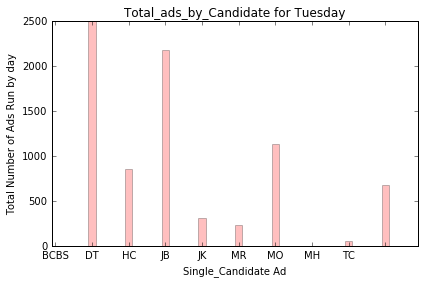

In [619]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


n_groups = 10

ad_count1 = Ben_Carsont['count'].max()
ad_count2 = Bernie_Sanderst['count'].max()
ad_count3 = Donald_Trumpt['count'].max()
ad_count4 = Hillary_Clintont['count'].max()
ad_count5 = Jeb_Busht['count'].max()
ad_count6 = John_Kasicht['count'].max()
ad_count7 = Marco_Rubiot['count'].max()
ad_count8 = Martin_O_Malleyt['count'].max()
ad_count9 = Mike_Huckabeet['count'].max()
ad_count10 = Ted_Cruzt['count'].max()
ad_count11= Chris_Christie['count'].max()


total_adst = (ad_count2, ad_count3, ad_count4, ad_count5, ad_count6, ad_count7, ad_count8, ad_count9, ad_count10)

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.2

opacity = 0.25

rects1 = plt.bar(index, total_ads, bar_width,
                 alpha=opacity,
                 color='r')
plt.xlabel('Single_Candidate Ad')
plt.ylabel('Total Number of Ads Run by day')
plt.title('Total_ads_by_Candidate for Tuesday')
plt.xticks(index + bar_width/2, ('BC' 'BS', 'DT', 'HC', 'JB', 'JK', 'MR', 'MO', 'MH', 'TC'))
plt.legend()
plt.tight_layout()
plt.show()
#plt.savefig('Total_Ads_Aired_Tuesday.png')

WEDNESDAY

In [222]:
Ben_Carsonw = Wednesday[Wednesday['candidate']=='Ben Carson']
Bernie_Sandersw = Wednesday[Wednesday['candidate']=='Bernie Sanders']
Carly_Fiorinaw = Wednesday[Wednesday['candidate']=='Carly Fiorina']
Donald_Trumpw = Wednesday[Wednesday['candidate']=='Donald Trump']
Hillary_Clintonw = Wednesday[Wednesday['candidate']=='Hillary Clinton']
Jeb_Bushw = Wednesday[Wednesday['candidate']=='Jeb Bush']
John_Kasichw = Wednesday[Wednesday['candidate']=='John Kasich']
Marco_Rubiow = Wednesday[Wednesday['candidate']=='Marco Rubio']
Martin_O_Malleyw = Wednesday[Wednesday['candidate']=='Ben Carson']
Mike_Huckabeew = Wednesday[Wednesday['candidate']=='Mike Huckabee']
Ted_Cruzw = Wednesday[Wednesday['candidate']=='Ted Cruz']
#should've made a class

/Users/elizabethchabot/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


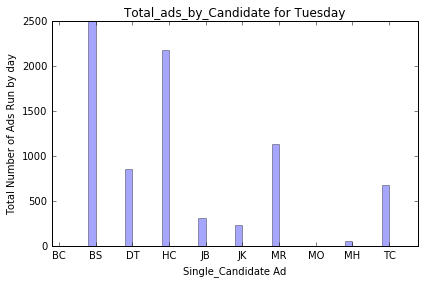

In [223]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


n_groups = 10

ad_count1 = Ben_Carsonw['count'].max()
ad_count2 = Bernie_Sandersw['count'].max()
ad_count3 = Donald_Trumpw['count'].max()
ad_count4 = Hillary_Clintonw['count'].max()
ad_count5 = Jeb_Bushw['count'].max()
ad_count6 = John_Kasichw['count'].max()
ad_count7 = Marco_Rubiow['count'].max()
ad_count8 = Martin_O_Malleyw['count'].max()
ad_count9 = Mike_Huckabeew['count'].max()
ad_count10 = Ted_Cruzw['count'].max()

total_adsw = (ad_count1, ad_count2, ad_count3, ad_count4, ad_count5, ad_count6, ad_count7, ad_count8, ad_count9, ad_count10,)

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.2

opacity = 0.35
error_config = {'ecolor': '0.3'}

rects1 = plt.bar(index, total_ads, bar_width,
                 alpha=opacity,
                 color='b')
plt.xlabel('Single_Candidate Ad')
plt.ylabel('Total Number of Ads Run by day')
plt.title('Total_ads_by_Candidate for Tuesday')
plt.xticks(index + bar_width, ('BC', 'BS', 'DT', 'HC', 'JB', 'JK', 'MR', 'MO', 'MH', 'TC'))
plt.legend()

plt.tight_layout()
plt.show()
plt.savefig('Total_Ads_Aired_Wednesday.png')

THURSDAY

In [224]:
Ben_Carsonh = Thursday[Thursday['candidate']=='Ben Carson']
Bernie_Sandersh = Thursday[Thursday['candidate']=='Bernie Sanders']
Carly_Fiorinah = Thursday[Thursday['candidate']=='Carly Fiorina']
Donald_Trumph = Thursday[Thursday['candidate']=='Donald Trump']
Hillary_Clintonh = Thursday[Thursday['candidate']=='Hillary Clinton']
Jeb_Bushh = Thursday[Thursday['candidate']=='Jeb Bush']
John_Kasichh = Thursday[Thursday['candidate']=='John Kasich']
Marco_Rubioh = Thursday[Thursday['candidate']=='Marco Rubio']
Martin_O_Malleyh = Thursday[Thursday['candidate']=='Ben Carson']
Mike_Huckabeeh = Thursday[Thursday['candidate']=='Mike Huckabee']
Ted_Cruzh = Thursday[Thursday['candidate']=='Ted Cruz']
#should've made a class

/Users/elizabethchabot/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


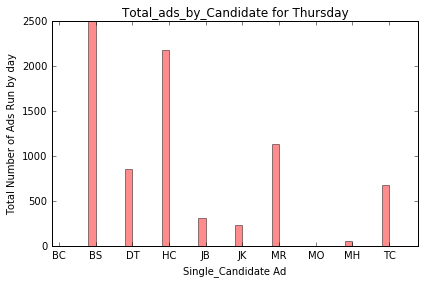

In [225]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


n_groups = 10

ad_count1 = Ben_Carsonh['count'].max()
ad_count2 = Bernie_Sandersh['count'].max()
ad_count3 = Donald_Trumph['count'].max()
ad_count4 = Hillary_Clintonh['count'].max()
ad_count5 = Jeb_Bushh['count'].max()
ad_count6 = John_Kasichh['count'].max()
ad_count7 = Marco_Rubioh['count'].max()
ad_count8 = Martin_O_Malleyh['count'].max()
ad_count9 = Mike_Huckabeeh['count'].max()
ad_count10 = Ted_Cruzh['count'].max()

total_adsth = (ad_count1, ad_count2, ad_count3, ad_count4, ad_count5, ad_count6, ad_count7, ad_count8, ad_count9, ad_count10,)

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.2

opacity = 0.45
error_config = {'ecolor': '0.3'}

rects1 = plt.bar(index, total_ads, bar_width,
                 alpha=opacity,
                 color='r')
plt.xlabel('Single_Candidate Ad')
plt.ylabel('Total Number of Ads Run by day')
plt.title('Total_ads_by_Candidate for Thursday')
plt.xticks(index + bar_width, ('BC', 'BS', 'DT', 'HC', 'JB', 'JK', 'MR', 'MO', 'MH', 'TC'))
plt.legend()

plt.tight_layout()
plt.show()
plt.savefig('Total_Ads_Aired_Thursday.png')

FRIDAY

In [226]:
Ben_Carsonf = Friday[Friday['candidate']=='Ben Carson']
Bernie_Sandersf = Friday[Friday['candidate']=='Bernie Sanders']
Carly_Fiorinaf = Friday[Friday['candidate']=='Carly Fiorina']
Donald_Trumpf = Friday[Friday['candidate']=='Donald Trump']
Hillary_Clintonf = Friday[Friday['candidate']=='Hillary Clinton']
Jeb_Bushf = Friday[Friday['candidate']=='Jeb Bush']
John_Kasichf = Friday[Friday['candidate']=='John Kasich']
Marco_Rubiof = Friday[Friday['candidate']=='Marco Rubio']
Martin_O_Malleyf = Friday[Friday['candidate']=='Ben Carson']
Mike_Huckabeef = Friday[Friday['candidate']=='Mike Huckabee']
Ted_Cruzf = Friday[Friday['candidate']=='Ted Cruz']
#should've made a class

/Users/elizabethchabot/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


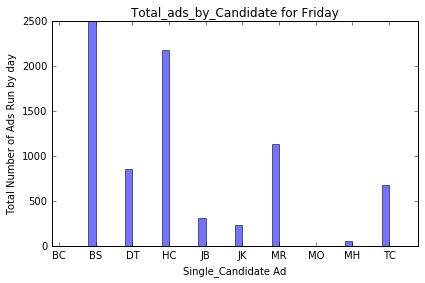

In [227]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


n_groups = 10

ad_count1 = Ben_Carsonf['count'].max()
ad_count2 = Bernie_Sandersf['count'].max()
ad_count3 = Donald_Trumpf['count'].max()
ad_count4 = Hillary_Clintonf['count'].max()
ad_count5 = Jeb_Bushf['count'].max()
ad_count6 = John_Kasichf['count'].max()
ad_count7 = Marco_Rubiof['count'].max()
ad_count8 = Martin_O_Malleyf['count'].max()
ad_count9 = Mike_Huckabeef['count'].max()
ad_count10 = Ted_Cruzf['count'].max()

total_adsf = (ad_count1, ad_count2, ad_count3, ad_count4, ad_count5, ad_count6, ad_count7, ad_count8, ad_count9, ad_count10,)

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.2

opacity = 0.55
error_config = {'ecolor': '0.3'}

rects1 = plt.bar(index, total_ads, bar_width,
                 alpha=opacity,
                 color='b')
plt.xlabel('Single_Candidate Ad')
plt.ylabel('Total Number of Ads Run by day')
plt.title('Total_ads_by_Candidate for Friday')
plt.xticks(index + bar_width, ('BC', 'BS', 'DT', 'HC', 'JB', 'JK', 'MR', 'MO', 'MH', 'TC'))
plt.legend()

plt.tight_layout()
plt.show()
plt.savefig('Total_Ads_Aired_Friday.png')

SATURDAY

In [229]:
Ben_Carsons = Saturday[Saturday['candidate']=='Ben Carson']
Bernie_Sanderss = Saturday[Saturday['candidate']=='Bernie Sanders']
Carly_Fiorinas = Saturday[Saturday['candidate']=='Carly Fiorina']
Donald_Trumps = Saturday[Saturday['candidate']=='Donald Trump']
Hillary_Clintons = Saturday[Saturday['candidate']=='Hillary Clinton']
Jeb_Bushs = Saturday[Saturday['candidate']=='Jeb Bush']
John_Kasichs = Saturday[Saturday['candidate']=='John Kasich']
Marco_Rubios = Saturday[Saturday['candidate']=='Marco Rubio']
Martin_O_Malleys = Saturday[Saturday['candidate']=='Ben Carson']
Mike_Huckabees = Saturday[Saturday['candidate']=='Mike Huckabee']
Ted_Cruzs = Saturday[Saturday['candidate']=='Ted Cruz']
#should've made a class

/Users/elizabethchabot/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


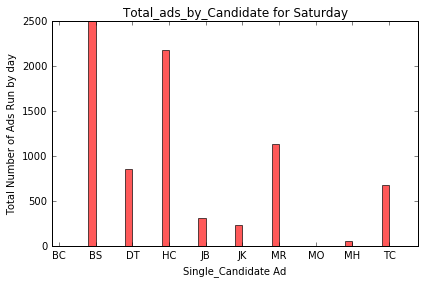

In [230]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


n_groups = 10

ad_count1 = Ben_Carsons['count'].max()
ad_count2 = Bernie_Sanderss['count'].max()
ad_count3 = Donald_Trumps['count'].max()
ad_count4 = Hillary_Clintons['count'].max()
ad_count5 = Jeb_Bushs['count'].max()
ad_count6 = John_Kasichs['count'].max()
ad_count7 = Marco_Rubios['count'].max()
ad_count8 = Martin_O_Malleys['count'].max()
ad_count9 = Mike_Huckabees['count'].max()
ad_count10 = Ted_Cruzs['count'].max()

total_adss = (ad_count1, ad_count2, ad_count3, ad_count4, ad_count5, ad_count6, ad_count7, ad_count8, ad_count9, ad_count10,)

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.2

opacity = 0.65
error_config = {'ecolor': '0.3'}

rects1 = plt.bar(index, total_ads, bar_width,
                 alpha=opacity,
                 color='r')
plt.xlabel('Single_Candidate Ad')
plt.ylabel('Total Number of Ads Run by day')
plt.title('Total_ads_by_Candidate for Saturday')
plt.xticks(index + bar_width, ('BC', 'BS', 'DT', 'HC', 'JB', 'JK', 'MR', 'MO', 'MH', 'TC'))
plt.legend()

plt.tight_layout()
plt.show()
plt.savefig('Total_Ads_Aired_Saturday.png')

SUNDAY

In [231]:
Ben_Carsonu = Sunday[Sunday['candidate']=='Ben Carson']
Bernie_Sandersu = Sunday[Sunday['candidate']=='Bernie Sanders']
Carly_Fiorinau = Sunday[Sunday['candidate']=='Carly Fiorina']
Donald_Trumpu = Sunday[Sunday['candidate']=='Donald Trump']
Hillary_Clintonu = Sunday[Sunday['candidate']=='Hillary Clinton']
Jeb_Bushu = Sunday[Sunday['candidate']=='Jeb Bush']
John_Kasichu = Sunday[Sunday['candidate']=='John Kasich']
Marco_Rubiou = Sunday[Sunday['candidate']=='Marco Rubio']
Martin_O_Malleyu = Sunday[Sunday['candidate']=='Ben Carson']
Mike_Huckabeeu = Sunday[Sunday['candidate']=='Mike Huckabee']
Ted_Cruzu = Sunday[Sunday['candidate']=='Ted Cruz']
#should've made a class

/Users/elizabethchabot/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


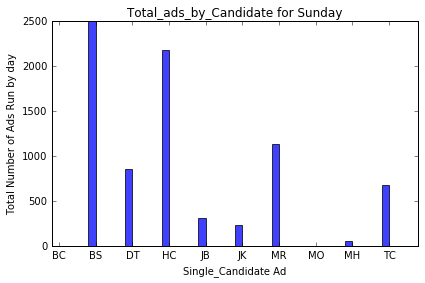

In [232]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


n_groups = 10

ad_count1 = Ben_Carsonu['count'].max()
ad_count2 = Bernie_Sandersu['count'].max()
ad_count3 = Donald_Trumpu['count'].max()
ad_count4 = Hillary_Clintonu['count'].max()
ad_count5 = Jeb_Bushu['count'].max()
ad_count6 = John_Kasichu['count'].max()
ad_count7 = Marco_Rubiou['count'].max()
ad_count8 = Martin_O_Malleyu['count'].max()
ad_count9 = Mike_Huckabeeu['count'].max()
ad_count10 = Ted_Cruzu['count'].max()

total_adssu = (ad_count1, ad_count2, ad_count3, ad_count4, ad_count5, ad_count6, ad_count7, ad_count8, ad_count9, ad_count10,)

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.2

opacity = 0.75

rects1 = plt.bar(index, total_ads, bar_width,
                 alpha=opacity,
                 color='b')
plt.xlabel('Single_Candidate Ad')
plt.ylabel('Total Number of Ads Run by day')
plt.title('Total_ads_by_Candidate for Sunday')
plt.xticks(index + bar_width, ('BC', 'BS', 'DT', 'HC', 'JB', 'JK', 'MR', 'MO', 'MH', 'TC'))
plt.legend()

plt.tight_layout()
plt.show()
plt.savefig('Total_Ads_Aired_Sunday.png')

In [ ]:
Most Ads Aired

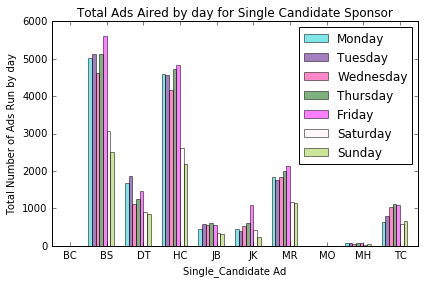

In [478]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


n_groups = 10



total_adsm 
total_adst
total_adsw
total_adsth
total_adsf
total_adss
total_adssu


fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.1

opacity = 0.5

rects1 = plt.bar(index, total_adsm, bar_width,
                 alpha=opacity,
                 color='darkturquoise', label='Monday')

rects2 = plt.bar(index + bar_width, total_adst, bar_width,
                 alpha=opacity,
                 color='indigo',
                 label='Tuesday')



rects3 = plt.bar(index + (bar_width*2), total_adsw, bar_width,
                 alpha=opacity,
                 color='deeppink',
                 label='Wednesday')

rects4 = plt.bar(index + (bar_width*3), total_adsth, bar_width,
                 alpha=opacity,
                 color='darkgreen',
                 label='Thursday')

rects5 = plt.bar(index + (bar_width*4), total_adsf, bar_width,
                 alpha=opacity,
                 color='magenta',
                 label='Friday')

rects6 = plt.bar(index + (bar_width*5), total_adss, bar_width,
                 alpha=opacity,
                 color='lavenderblush',
                 label='Saturday')

rects7 = plt.bar(index + (bar_width*6), total_adssu, bar_width,
                 alpha=opacity,
                 color='yellowgreen',
                 label='Sunday')


plt.xlabel('Single_Candidate Ad')
plt.ylabel('Total Number of Ads Run by day')
plt.title('Total Ads Aired by day for Single Candidate Sponsor')
plt.xticks(index + bar_width*5, ('BC', 'BS', 'DT', 'HC', 'JB', 'JK', 'MR', 'MO', 'MH', 'TC'))
plt.legend()

plt.tight_layout()
plt.savefig('Total_Ads_Aired_by_day_per_single_cand_spon.png')
plt.show()
plt.savefig('Total_Ads_Aired_for_Single_Candidate_bySponsor_by_day_of_week.png')

In [ ]:
BS or Bernie had most ads aired on friday

Bernie Sanders dominates the TV_AD campaign for total ads by day. Look into average number of ads per day for sponsored affiliation Bernie Sanders: 
Look into which sponsored_aff had the most ads: Was it Bernie?
Now output what day has the most ads aired:
What time of day has the most ads aired:

Does this vary across states? Evening more likely to air sponsorship?

In [540]:
q4.to_csv('Q45.csv')
q45 = pd.read_csv('Q45.csv', header = None, names = ['Sponsor_aff', 'day_week', 'ad_count'])
q45['ad_count'].max()
ordq45 = q45.sort('ad_count', ascending = False)


toptenadtotal = ordq45.head(10)
toptenadtotal
#lowtenadtotal = ordq45.tail(10)
#lowtenadtotal

/Users/elizabethchabot/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning:

sort(columns=....) is deprecated, use sort_values(by=.....)



,Sponsor_aff,day_week,ad_count
5,Bernie Sanders,4,5600
4,Bernie Sanders,3,5128
2,Bernie Sanders,1,5114
1,Bernie Sanders,0,5032
113,Hillary Clinton,4,4843
112,Hillary Clinton,3,4721
3,Bernie Sanders,2,4624
109,Hillary Clinton,0,4595
110,Hillary Clinton,1,4568
111,Hillary Clinton,2,4161


Bernie Sanders and Hillary Clinton Sponsored ads fall within the top ten largest total ads by day, even without excluding multi candidate sponsors.
All ads that fall within the lowest ad count happen to be combination sponsors.

In [312]:
dfq45 = q45.groupby(['day_week', 'Sponsor_aff'])['ad_count'].sum()
df45 = pd.DataFrame(dfq45)
df45.to_csv('df45.csv')
dfdadtot = pd.read_csv('df45.csv')
dfdadtot
MonTot_ad = dfdadtot[dfdadtot['day_week']== 0]['ad_count'].sum()
print('Monday:', MonTot_ad)
TueTot_ad = dfdadtot[dfdadtot['day_week']== 1]['ad_count'].sum()
print('Tuesday:', TueTot_ad)
WedTot_ad = dfdadtot[dfdadtot['day_week']== 2]['ad_count'].sum()
print('Wednesday:', WedTot_ad)
ThuTot_ad = dfdadtot[dfdadtot['day_week']== 3]['ad_count'].sum()
print('Thursday:', ThuTot_ad)
FriTot_ad = dfdadtot[dfdadtot['day_week']== 4]['ad_count'].sum()
print('Friday:', FriTot_ad)
SatTot_ad = dfdadtot[dfdadtot['day_week']== 5]['ad_count'].sum()
print('Saturday:', SatTot_ad)
SunTot_ad = dfdadtot[dfdadtot['day_week']== 6]['ad_count'].sum()
print('Sunday:', SunTot_ad)

Monday: 18174
Tuesday: 19147
Wednesday: 17214
Thursday: 18698
Friday: 20115
Saturday: 11043
Sunday: 9880


Friday had the most ads aired in total at 20115.
The most ads aired by Bernie Sanders where also aired on Friday.

What state had the most ads? Was there a single sponsor candidate that had the most ads aired in all states? Did most ads aired have any relationship to votes? Must divide single party voters into dem and republican.

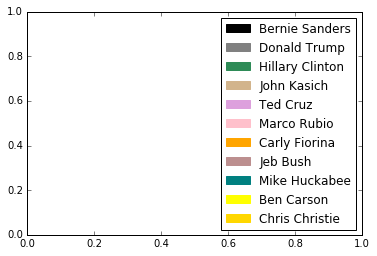

In [617]:
state_adtot = q4df.groupby(['state', 'candidate'])['count'].sum()
st_adtot = pd.DataFrame(state_adtot)
state_total = q4df.groupby(['day_week', 'state', 'candidate'])['count'].sum()
st_tot = pd.DataFrame(state_total)
st_adtot.to_csv('stadtot.csv')
stadtot = pd.read_csv('stadtot.csv')
#if time graph state data
stadtot['state'].unique()
votes_state = df7.groupby(['state', 'candidate', 'votes', 'vote_pct']).sum()
votes_state = pd.DataFrame(votes_state)
votes_state.to_csv('votesst.csv')
vtst = pd.read_csv('votesst.csv')
col_list = ['state', 'candidate', 'votes', 'vote_pct']
vtst = vtst[col_list]
vtst
vt_st = pd.merge(vtst, stadtot, on = ['state', 'candidate'], how = 'left')
vt_st
#count=number of ads
vt_st.fillna(0)
color_dict = {'Bernie Sanders': 'black', 'Donald Trump': 'grey', 'Hillary Clinton': 'seagreen', 'John Kasich': 'tan', 'Ted Cruz': 'plum', 'Marco Rubio': 'pink', 'Carly Fiorina': 'orange', 'Jeb Bush': 'rosybrown', 'Mike Huckabee':'teal', 'Ben Carson':'yellow', 'Chris Christie':'gold'}
BS = mpatches.Patch(color='black', label='Bernie Sanders')
DT = mpatches.Patch(color='grey', label='Donald Trump')
HC = mpatches.Patch(color='seagreen', label='Hillary Clinton')
JK = mpatches.Patch(color='tan', label='John Kasich')
TC = mpatches.Patch(color='plum', label='Ted Cruz')
MR = mpatches.Patch(color='pink', label='Marco Rubio')
CF = mpatches.Patch(color='orange', label='Carly Fiorina')
JB = mpatches.Patch(color='rosybrown', label='Jeb Bush')
MH = mpatches.Patch(color='teal', label='Mike Huckabee')
BC = mpatches.Patch(color='yellow', label='Ben Carson')
CC = mpatches.Patch(color='gold', label='Chris Christie')

plt.legend(handles=[BS, DT, HC, JK, TC, MR, CF, JB, MH, BC, CC])

In [601]:
vt_st['sing_spons'] = vt_st['candidate']
vt_st['prim_order']= vt_st['state']
vt_st['sing_spons'].replace(color_dict, inplace=True)
vt_st
#assign color to the candidates
ordprim = vt_st['state'].unique()
order_prim = {'NH': 1, 'MA': 2, 'VA': 3, 'FL': 4, 'NC': 5, 'OH': 6, 'NY': 7, 'PA': 8, 'CA': 9, 'SC': 10, 'CO': 11, 'IA': 12, 'NV': 13}
vt_st['prim_order'].replace(order_prim, inplace=True)
vt_st.to_csv('REV2.csv')
vt_st['sing_spons'].unique()
#vtstdict = vt_st.to_dict()
#vt_st[vt_st['sing_spons'] == 'Chris Christie'] = 'gold'

array(['black', 'grey', 'seagreen', 'tan', 'plum', 'pink', 'orange',
       'rosybrown', 'teal', 'gold'], dtype=object)

In [609]:
from matplotlib.colors import colorConverter
color = list(vt_st['sing_spons'])
c = []
for i in color:
    c.append(colorConverter.to_rgb(i))

c[10]

vt_st['prim_order'].unique()
vt_st
t_list = ['state', 'candidate', 'votes', 'count']
table = vt_st[t_list]
table
Bern = vt_st[vt_st['candidate']=='Bernie Sanders']
Bernie = Bern.to_csv('Berniebubble.csv')
Hill = vt_st[vt_st['candidate']=='Hillary Clinton']
Hillary = Hill.to_csv('Hillarybubble.csv')

CAL = table[table['state']=='CA']
COL = table[table['state']=='CO']

FLO = table[table['state']=='FL']

IOW = table[table['state']=='IA']

MAI = table[table['state']=='MA']

NOR = table[table['state']=='NC']

NEW = table[table['state']=='NH']

NV = table[table['state']=='NV']

NY = table[table['state']=='NY']

OHI = table[table['state']=='OH']

PEN = table[table['state']=='PA']

SOU = table[table['state']=='SC']

VIR = table[table['state']=='VA']

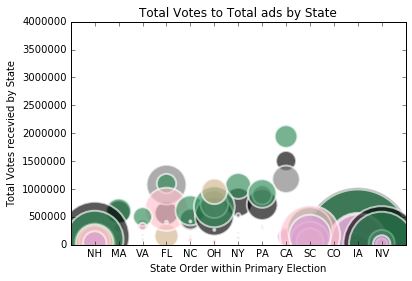

In [612]:
from pylab import *
from scipy import *
import numpy
import matplotlib.patches as mpatches

x = list(vt_st['prim_order'])
y = list(vt_st['votes'])

color = c
area = list(vt_st['count'])
opacity = 0.65

index = range(14)    


sct = scatter(x, y, alpha = opacity, c=color, s=area, linewidths=2, edgecolor='w')

BS = mpatches.Patch(color='black', label='Bernie Sanders')
DT = mpatches.Patch(color='grey', label='Donald Trump')
HC = mpatches.Patch(color='teal', label='Hillary Clinton')
JK = mpatches.Patch(color='tan', label='John Kasich')
TC = mpatches.Patch(color='plum', label='Ted Cruz')
MR = mpatches.Patch(color='pink', label='Marco Rubio')
CF = mpatches.Patch(color='orange', label='Carly Fiorina')
JB = mpatches.Patch(color='rosybrown', label='Jeb Bush')
MH = mpatches.Patch(color='seagreen', label='Mike Huckabee')
BC = mpatches.Patch(color='yellow', label='Ben Carson')
CC = mpatches.Patch(color='gold', label='Chris Christie')


axis([0,14,0,4000000])
xlabel('State Order within Primary Election')
ylabel('Total Votes recevied by State')
plt.title('Total Votes to Total ads by State')
plt.xticks((0,1,2,3,4,5,6,7,8,9,10,11,12,13,14),('', 'NH', 'MA', 'VA', 'FL', 'NC', 'OH', 'NY', 'PA', 'CA', 'SC', 'CO', 'IA', 'NV'))
plt.savefig('Bubble.png')
show()

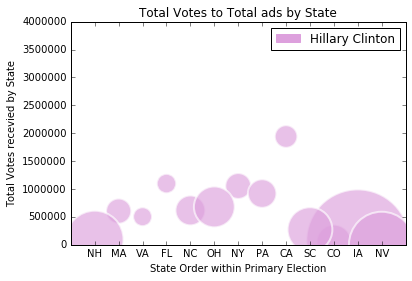

In [613]:
from pylab import *
from scipy import *
import numpy
import matplotlib.patches as mpatches
# reading the data from a csv file

x = list(Hill['prim_order'])
y = list(Hill['votes'])

color = c[4]
area = list(Hill['count'])
opacity = 0.65
#savefig('sample.pdf')


index = range(14)    

sct = scatter(x, y, alpha = opacity, c=color, s=area, linewidths=2, edgecolor='w')

BS = mpatches.Patch(color='black', label='Bernie Sanders')
DT = mpatches.Patch(color='grey', label='Donald Trump')
HC = mpatches.Patch(color='plum', label='Hillary Clinton')
JK = mpatches.Patch(color='tan', label='John Kasich')
TC = mpatches.Patch(color='teal', label='Ted Cruz')
MR = mpatches.Patch(color='pink', label='Marco Rubio')
CF = mpatches.Patch(color='orange', label='Carly Fiorina')
JB = mpatches.Patch(color='rosybrown', label='Jeb Bush')
MH = mpatches.Patch(color='seagreen', label='Mike Huckabee')
BC = mpatches.Patch(color='yellow', label='Ben Carson')
CC = mpatches.Patch(color='gold', label='Chris Christie')

plt.legend(handles=[HC])


axis([0,14,0,4000000])
xlabel('State Order within Primary Election')
ylabel('Total Votes recevied by State')
plt.title('Total Votes to Total ads by State')
plt.xticks((0,1,2,3,4,5,6,7,8,9,10,11,12,13,14),('', 'NH', 'MA', 'VA', 'FL', 'NC', 'OH', 'NY', 'PA', 'CA', 'SC', 'CO', 'IA', 'NV'))
plt.savefig('HillaryBubble.png')
show()
#assign end date for each of the state's primaries and use this as the x axis

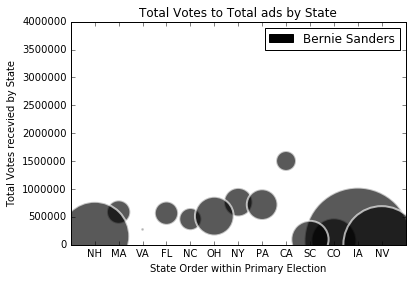

In [614]:
from pylab import *
from scipy import *
import numpy
import matplotlib.patches as mpatches
# reading the data from a csv file

x = list(Bern['prim_order'])
y = list(Bern['votes'])

color = c[0]
area = list(Bern['count'])
opacity = 0.65
#savefig('sample.pdf')

index = range(14)    

sct = scatter(x, y, alpha = opacity, c=color, s=area, linewidths=2, edgecolor='w')

BS = mpatches.Patch(color='black', label='Bernie Sanders')
DT = mpatches.Patch(color='grey', label='Donald Trump')
HC = mpatches.Patch(color='teal', label='Hillary Clinton')
JK = mpatches.Patch(color='tan', label='John Kasich')
TC = mpatches.Patch(color='plum', label='Ted Cruz')
MR = mpatches.Patch(color='pink', label='Marco Rubio')
CF = mpatches.Patch(color='orange', label='Carly Fiorina')
JB = mpatches.Patch(color='rosybrown', label='Jeb Bush')
MH = mpatches.Patch(color='seagreen', label='Mike Huckabee')
BC = mpatches.Patch(color='yellow', label='Ben Carson')
CC = mpatches.Patch(color='gold', label='Chris Christie')

plt.legend(handles=[BS])


axis([0,14,0,4000000])
xlabel('State Order within Primary Election')
ylabel('Total Votes recevied by State')
plt.title('Total Votes to Total ads by State')
plt.xticks((0,1,2,3,4,5,6,7,8,9,10,11,12,13,14),('', 'NH', 'MA', 'VA', 'FL', 'NC', 'OH', 'NY', 'PA', 'CA', 'SC', 'CO', 'IA', 'NV'))
plt.savefig('BernieBubble.png')
show()

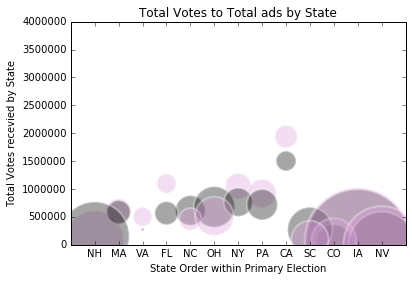

In [615]:

from pylab import *
from scipy import *
import numpy
import matplotlib.patches as mpatches
# reading the data from a csv file
hb = pd.read_csv('HBBub.csv')
x = list(hb['prim_order'])
y = list(hb['votes'])
#color = list(vt_st['sing_spons'])
#color = tuple(numpy.random.rand(4))
color = c[4], c[0]
area = list(hb['count'])
opacity = 0.35

index = range(14)    

sct = scatter(x, y, alpha = opacity, c=color, s=area, linewidths=2, edgecolor='w')

axis([0,14,0,4000000])
xlabel('State Order within Primary Election')
ylabel('Total Votes recevied by State')
plt.title('Total Votes to Total ads by State')
plt.xticks((0,1,2,3,4,5,6,7,8,9,10,11,12,13,14),('', 'NH', 'MA', 'VA', 'FL', 'NC', 'OH', 'NY', 'PA', 'CA', 'SC', 'CO', 'IA', 'NV'))
plt.savefig('HBBubble.png')
show()

In [620]:
BS = mpatches.Patch(color='black', label='Bernie Sanders')
HC = mpatches.Patch(color='plum', label='Hillary Clinton')

#plt.legend(handles=[BS,HC])
#plt.savefig('HBBUBLEGEND.csv')

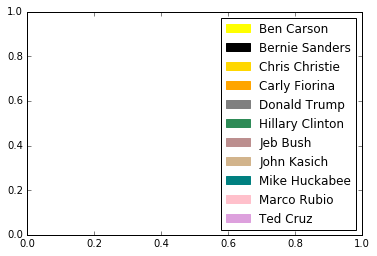

In [621]:
BS = mpatches.Patch(color='black', label='Bernie Sanders')
DT = mpatches.Patch(color='grey', label='Donald Trump')
HC = mpatches.Patch(color='seagreen', label='Hillary Clinton')
JK = mpatches.Patch(color='tan', label='John Kasich')
TC = mpatches.Patch(color='plum', label='Ted Cruz')
MR = mpatches.Patch(color='pink', label='Marco Rubio')
CF = mpatches.Patch(color='orange', label='Carly Fiorina')
JB = mpatches.Patch(color='rosybrown', label='Jeb Bush')
MH = mpatches.Patch(color='teal', label='Mike Huckabee')
BC = mpatches.Patch(color='yellow', label='Ben Carson')
CC = mpatches.Patch(color='gold', label='Chris Christie')

plt.legend(handles=[BC, BS, CC, CF, DT, HC, JB, JK, MH, MR, TC])
#plt.savefig('Bubblekey.png')
#plt.show()

COLORS

In [234]:
import matplotlib
for name, hex in matplotlib.colors.cnames.items():
    print(name, hex)

slategrey #708090
black #000000
plum #DDA0DD
darkturquoise #00CED1
darksalmon #E9967A
wheat #F5DEB3
lightseagreen #20B2AA
darkorange #FF8C00
lemonchiffon #FFFACD
orangered #FF4500
lightsage #BCECAC
burlywood #DEB887
deepskyblue #00BFFF
deeppink #FF1493
seagreen #2E8B57
crimson #DC143C
tomato #FF6347
mediumspringgreen #00FA9A
orchid #DA70D6
ghostwhite #F8F8FF
snow #FFFAFA
orange #FFA500
lavenderblush #FFF0F5
cornsilk #FFF8DC
olive #808000
darksage #598556
navy #000080
dimgray #696969
mediumpurple #9370DB
indianred #CD5C5C
rosybrown #BC8F8F
darkgrey #A9A9A9
mediumturquoise #48D1CC
lightgoldenrodyellow #FAFAD2
royalblue #4169E1
cornflowerblue #6495ED
lightslategray #778899
blanchedalmond #FFEBCD
navajowhite #FFDEAD
chartreuse #7FFF00
slateblue #6A5ACD
red #FF0000
lightcoral #F08080
peru #CD853F
darkviolet #9400D3
seashell #FFF5EE
darkolivegreen #556B2F
paleturquoise #AFEEEE
steelblue #4682B4
lightpink #FFB6C1
blue #0000FF
bisque #FFE4C4
chocolate #D2691E
lawngreen #7CFC00
mediumvioletred 